In [26]:
import numpy as np
import librosa
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=160, n_mels=128, fmin=20, fmax=8300, top_db=80):
  wav,sr = librosa.load(file_path,sr=sr)
  if wav.shape[0]<int(1.3*sr):
    wav=np.pad(wav,int(np.ceil((1.3*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:int(1.3*sr)]
  spec=librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft,
              hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
  spec_db=librosa.power_to_db(spec,top_db=top_db)
  return spec_db


In [27]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [1]:
import matplotlib.pyplot as plt

In [2]:
from keras.utils import load_img, img_to_array

# 이미지 shape, array, 사진 확인하기
def showimg(imgarr):
    plt.imshow(imgarr, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    print(imgarr.shape)

2023-11-24 11:56:39.072235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 11:56:39.072302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 11:56:39.139183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 11:56:39.264730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 11:56:40.739463: W tensorflow/compiler/tf2

In [66]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/unstructured_data/train/caterwaul'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
caterwaul_path = train_path


In [67]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/unstructured_data/train/meow'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
meow_path = train_path


In [82]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/unstructured_data/val/caterwaul'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
caterwaul_val_path = train_path

In [83]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/unstructured_data/val/meow'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
meow_val_path = train_path

In [68]:
print(caterwaul_path[0])

/catclass_ai/augmented_data/unstructured_data/train/caterwaul/516_186_7.wav


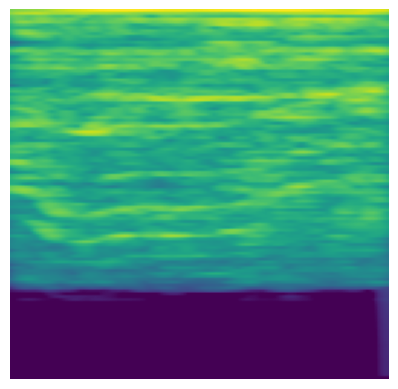

(128, 131)


In [72]:
showimg(spec_to_image(get_melspectrogram_db(str(caterwaul_path[4]))))

In [80]:
from PIL import Image

for i in range(len(caterwaul_path)):
    im = Image.fromarray(spec_to_image(get_melspectrogram_db(str(caterwaul_path[i]))))
    im.save("/catclass_ai/img_data/train/caterwaul/"+str(caterwaul_path[i]).split("/")[-1].split(".")[0]+'.jpeg')

In [81]:
from PIL import Image

for i in range(len(meow_path)):
    im = Image.fromarray(spec_to_image(get_melspectrogram_db(str(meow_path[i]))))
    im.save("/catclass_ai/img_data/train/meow/"+str(meow_path[i]).split("/")[-1].split(".")[0]+'.jpeg')

In [84]:
from PIL import Image

for i in range(len(caterwaul_val_path)):
    im = Image.fromarray(spec_to_image(get_melspectrogram_db(str(caterwaul_val_path[i]))))
    im.save("/catclass_ai/img_data/val/caterwaul/"+str(caterwaul_val_path[i]).split("/")[-1].split(".")[0]+'.jpeg')

In [85]:
from PIL import Image

for i in range(len(meow_val_path)):
    im = Image.fromarray(spec_to_image(get_melspectrogram_db(str(meow_val_path[i]))))
    im.save("/catclass_ai/img_data/val/meow/"+str(meow_val_path[i]).split("/")[-1].split(".")[0]+'.jpeg')

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("/catclass_ai/img_data/train/",
                                          target_size=(128,131),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 22695 images belonging to 2 classes.


In [5]:
# 테스트 데이터 생성하기
test = ImageDataGenerator(rescale=1/255)

test_dataset = test.flow_from_directory("/catclass_ai/img_data/val/",
                                          target_size=(128,131),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 333 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'caterwaul': 0, 'meow': 1}

1.0


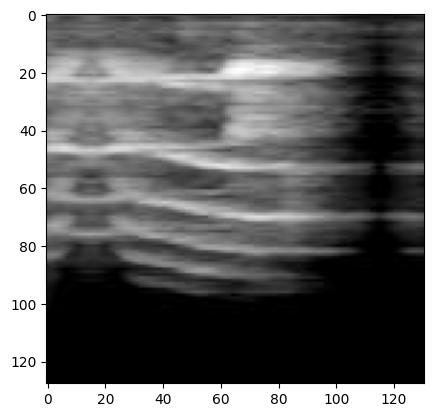

1.0


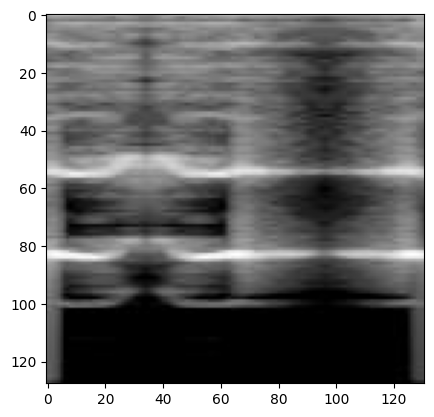

1.0


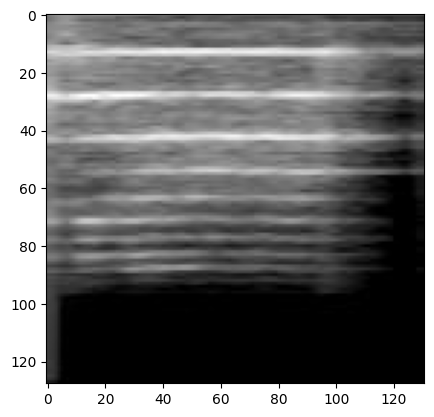

1.0


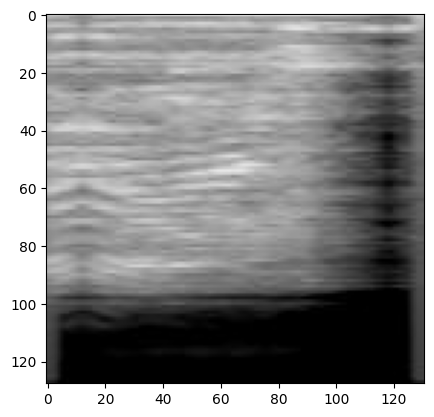

0.0


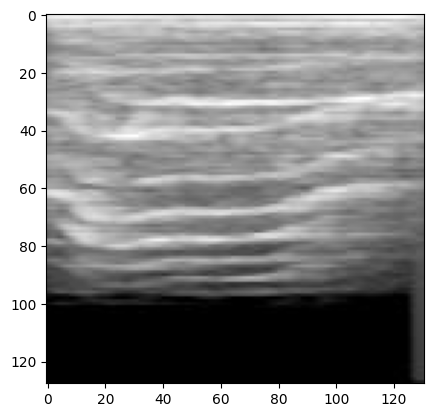

In [8]:
# 학습 데이터 레이블과 이미지 확인하기
for _ in range(5):
    img, label = train_dataset.next()
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [7]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
import random

In [13]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,131,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,131,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,131,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 129, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 64, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 62, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 31, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 30, 31, 64)       

In [15]:
# model.compile(optimizer = "adam" ,
#               loss = "binary_crossentropy",
#               metrics=["accuracy"])

model.compile(optimizer = "adam" ,
              loss = "sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

In [16]:
# from keras.callbacks import EarlyStopping

# custom_early_stopping = EarlyStopping(
#     monitor='accuracy',
#     patience=15
# )

#EarlyStopping 사용
from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=15
)

In [17]:
# 모델 학습

from keras.callbacks import ModelCheckpoint

# ModelCheckpoint 객체를 생성합니다.
checkpoint = ModelCheckpoint("/catclass_ai/weights_softmax.h5", monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

# 모델을 학습합니다. ModelCheckpoint 객체를 콜백으로 전달합니다.

history =  model.fit(train_dataset,
                     epochs=1000,
                     batch_size=32,
                     verbose=1,
                     validation_data = test_dataset,
                     callbacks=[custom_early_stopping,checkpoint])

model.save('/catclass_ai/model_softmax.h5')

Epoch 1/1000


2023-11-24 12:02:11.366925: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


709/710 [============================>.] - ETA: 0s - loss: 0.2105 - sparse_categorical_accuracy: 0.9109
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.97898, saving model to /catclass_ai/weights_softmax.h5
710/710 [==============================] - 19s 24ms/step - loss: 0.2105 - sparse_categorical_accuracy: 0.9109 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9790
Epoch 2/1000
708/710 [============================>.] - ETA: 0s - loss: 0.0733 - sparse_categorical_accuracy: 0.9806
Epoch 2: val_sparse_categorical_accuracy improved from 0.97898 to 0.98498, saving model to /catclass_ai/weights_softmax.h5
710/710 [==============================] - 17s 23ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0697 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/1000
708/710 [============================>.] - ETA: 0s - loss: 0.0691 - sparse_categorical_accuracy: 0.9809
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.98498
710/710

/root/anaconda3/envs/catclass/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# model.evaluate로 평가하기
score = model.evaluate(test_dataset, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 0s 21ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9850
Test loss: 0.06971142441034317
Test accuracy: 0.9849849939346313


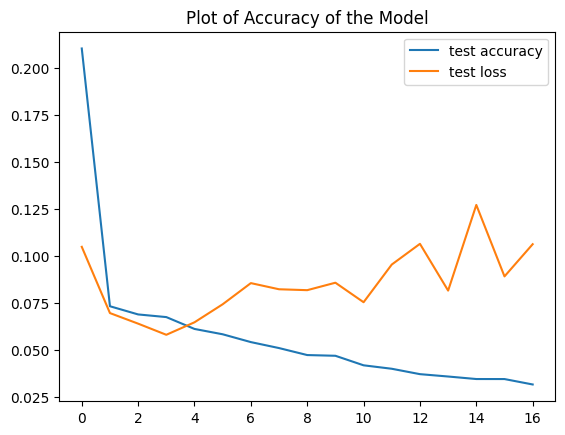

In [21]:
plt.title('Plot of Accuracy of the Model')
plt.plot(history.history['loss'], label='test accuracy')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [18]:
model.load_weights("/catclass_ai/weights_softmax.h5")

In [19]:
model.save('/catclass_ai/model_softmax.h5')

In [22]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/test/meow'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
test_meow_path = train_path

In [46]:
print(test_meow_path)

['/catclass_ai/augmented_data/test/meow/K4tAuzHXCVw_10_27.wav', '/catclass_ai/augmented_data/test/meow/M7jtDlV39r8_30_92.wav', '/catclass_ai/augmented_data/test/meow/8EmUkaIhr8M_30_269.wav', '/catclass_ai/augmented_data/test/meow/N25QXGVVXog_30_48.wav', '/catclass_ai/augmented_data/test/meow/IyBazGaHPeo_30_199.wav', '/catclass_ai/augmented_data/test/meow/3-Q-3tZRaLI_30_53.wav', '/catclass_ai/augmented_data/test/meow/6zwSfh9rFM8_30_2.wav', '/catclass_ai/augmented_data/test/meow/51I8U2iWrpM_30_55.wav', '/catclass_ai/augmented_data/test/meow/-4o0jRbgHr4_30_110.wav', '/catclass_ai/augmented_data/test/meow/5bf0JVLSIbY_30_83.wav', '/catclass_ai/augmented_data/test/meow/-_8E5aDUqas_30_19.wav', '/catclass_ai/augmented_data/test/meow/5-VdQ476qJ8_30_53.wav', '/catclass_ai/augmented_data/test/meow/BO7DUflFfIc_30_70.wav', '/catclass_ai/augmented_data/test/meow/-ugtQOTQMxM_30_49.wav', '/catclass_ai/augmented_data/test/meow/C0AY0FEhOxU_30_621.wav', '/catclass_ai/augmented_data/test/meow/1yADGwQBDrE_

In [23]:
from glob import glob
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = '/catclass_ai/augmented_data/test/caterwaul'
train_folder = glob(base_dir)
train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp
test_caterwaul_path = train_path

In [52]:
spec_to_image(get_melspectrogram_db(str(test_meow_path[0]))).shape

(128, 131)

In [63]:
from PIL import Image
def model_test(filename):
    im = Image.fromarray(spec_to_image(get_melspectrogram_db(filename)))
    im.save("/catclass_ai/0.jpeg")
    img1 = load_img("/catclass_ai/0.jpeg",target_size=(128,131))
    #plt.imshow(img1)
    imarr = img_to_array(img1)
    X = np.expand_dims(imarr,axis=0)
    val = model.predict(X,verbose=0)
    return val
    # if val == 1:
    #     plt.xlabel("Meow",fontsize=30)
    # elif val == 0:
    #     plt.xlabel("Caterwaul",fontsize=30)

In [68]:
for i in range(len(test_caterwaul_path)):
    a = (model_test(str(test_caterwaul_path[i])))
    if a[0][0]>0:
        print('caterwaul')
    else:
        print('meow')

caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
meow
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul
caterwaul


KeyboardInterrupt: 

1/1 [==============================] - 0s 24ms/step
[[0. 1.]]


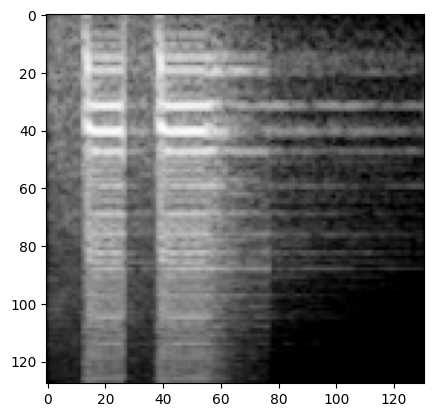

In [36]:
model_test("/catclass_ai/2.wav")